# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.tree import plot_tree

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

1. Нарисуйте график, на котором ось x - am, ось y - pm, точки - дни, цвет зависит от цели.
2. Добавьте на график границу принятия решения логистической регрессии.
3. Нарисуйте тот же график (с границей), но цвет на этот раз должен зависеть от прогнозов.

Теперь вам должно быть ясно, как работает логистическая регрессия.

In [2]:
df = pd.read_csv("data/am_pm.csv")
df.head()

,date,am,pm,target,predict
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day


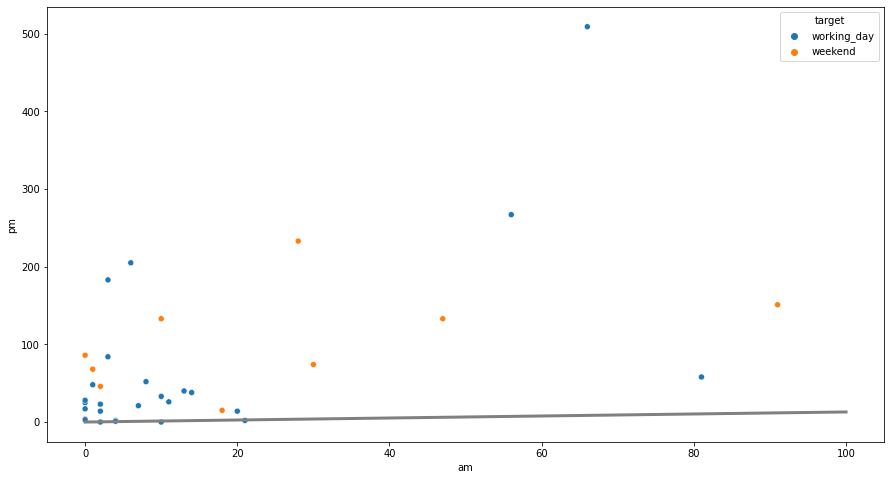

In [3]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=df, x="am", y="pm", hue="target", ax=ax)
coef = [-0.00038653,  0.00298066]
os_x = np.linspace(0,100,500)
preds = (-coef[0]*os_x)/coef[1]
plt.plot(os_x, preds, color = 'grey', lw = 3)

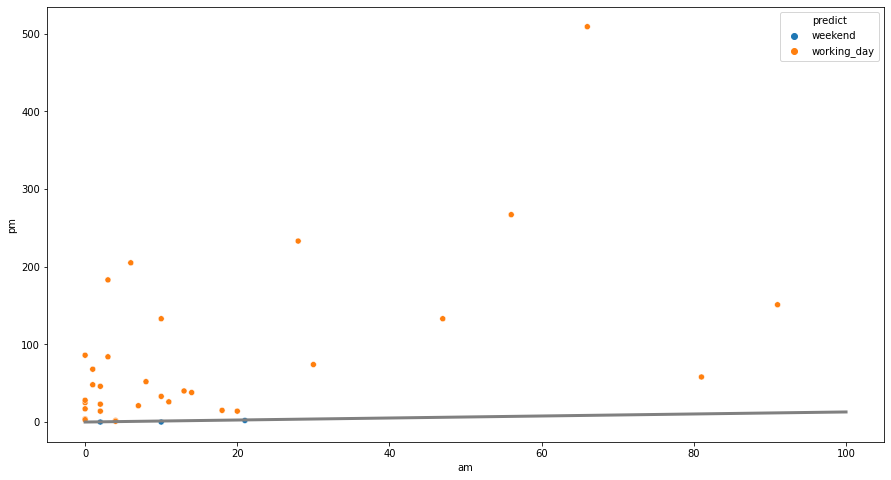

In [4]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=df, x="am", y="pm", hue="predict", ax=ax)
coef = [-0.00038653,  0.00298066]
os_x = np.linspace(0,100,500)
preds = (-coef[0]*os_x)/coef[1]
plt.plot(os_x, preds, color = 'grey', lw = 3)

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

Линейные модели могут быть чувствительны к масштабу ваших переменных. Вы упрощаете им поиск оптимального решения, когда масштабируете свои функции.

1. Примените StandardScaler к X и снова обучите логистическую регрессию с теми же параметрами.
2. Рассчитайте точность для новой модели. Получилось лучше, чем наивный классификатор с самым популярным классом?
3. Нарисуйте графики, которые были описаны выше, но для новой модели.

In [5]:
ss_train = StandardScaler().fit_transform(df[['am','pm']])

In [6]:
test = df['target']
log_ger = LogisticRegression(fit_intercept=False, random_state=21).fit(ss_train, test)
df['predict'] = log_ger.predict(ss_train)
df.head(5)

,date,am,pm,target,predict
0,2020-04-17,21,2,working_day,working_day
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day


Рассчитайте точность для новой модели. Получилось лучше, чем наивный классификатор с самым популярным классом? - да

In [7]:
accuracy_score(test, df.predict)

0.7428571428571429

Нарисуйте графики, которые были описаны выше, но для новой модели.

In [8]:
data = pd.DataFrame(ss_train, columns=['am', 'pm'])
data['target'] = df['target']
data['predict'] = df['predict']

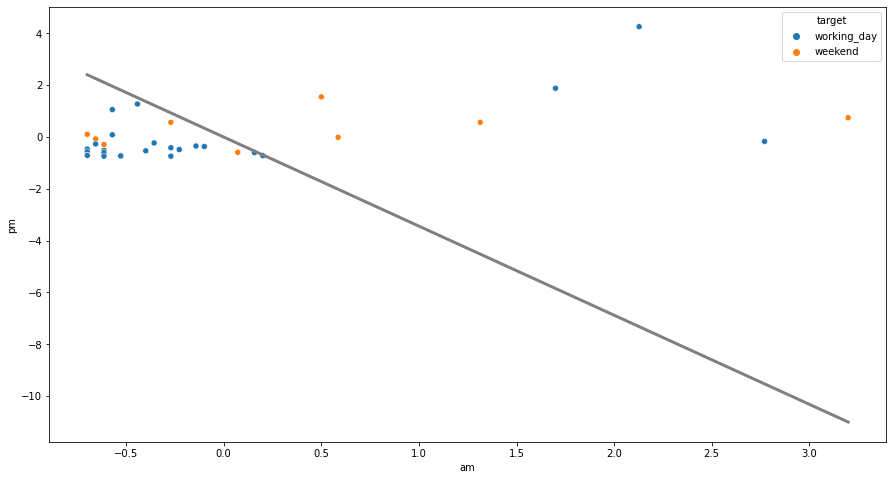

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x="am", y="pm", hue="target", ax=ax)
coef = [-0.25396542, -0.07384233] # log_ger.coef_
os_x = np.linspace(min(data['am']), max(data['am']))
preds = (-coef[0]*os_x) / coef[1]
plt.plot(os_x, preds, color = 'grey', lw = 3)

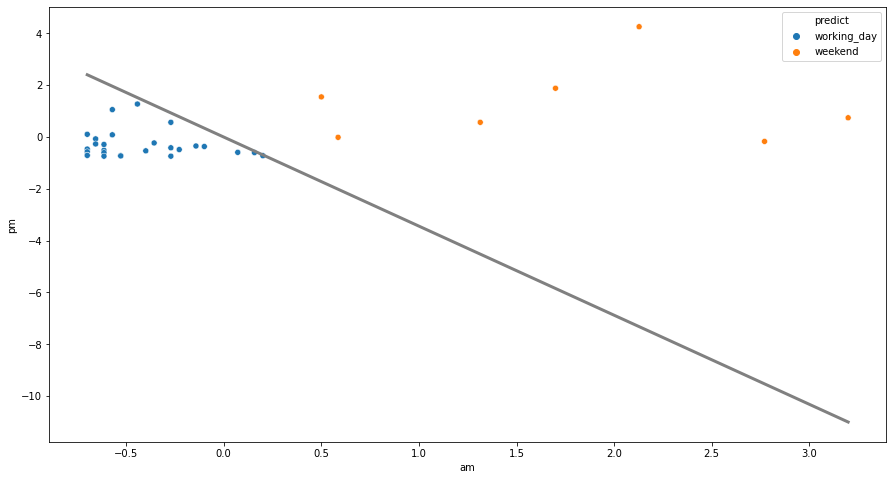

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x="am", y="pm", hue="predict", ax=ax)
coef = [-0.25396542, -0.07384233] # log_ger.coef_
os_x = np.linspace(min(data['am']), max(data['am']))
preds = (-coef[0]*os_x) / coef[1]
plt.plot(os_x, preds, color = 'grey', lw = 3)

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.


1. Примените модель SVC к масштабированному кадру данных, используя параметры «вероятность = Истина», «random_state = 21».
2. Вычислить "точность".
3. Пробуй разные ядра, найди лучшее по точности.
4. Снова нарисуйте оба графика с границей решений, чтобы увидеть, как работает этот алгоритм. 

Примените модель SVC к масштабированному кадру данных, используя параметры «вероятность = Истина», «random_state = 21»

In [11]:
model_svm = sklearn.svm.SVC(random_state = 21, probability=True)
model_svm.fit(data[['am', 'pm']], test)

SVC(probability=True, random_state=21)

In [12]:
data['predict'] = model_svm.predict(data[['am', 'pm']])

Calculate accuracy.

In [13]:
accuracy_score(test,data['predict'])

0.7428571428571429

Try different kernels, find the best in terms of accuracy.

In [14]:
model_svm = sklearn.svm.SVC(random_state = 21, probability=True, kernel ='linear')
model_svm.fit(data[['am', 'pm']], test)
accuracy_score(test, model_svm.predict(data[['am', 'pm']]))

0.7142857142857143

In [15]:
model_svm = sklearn.svm.SVC(random_state = 21, probability=True, kernel ='sigmoid')
model_svm.fit(data[['am', 'pm']], test)
accuracy_score(test, model_svm.predict(data[['am', 'pm']]))

0.6857142857142857

Снова нарисуйте оба графика с границей решений, чтобы увидеть, как работает этот алгоритм.

In [16]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    Z = [[1 if i == 'working_day' else 0 for i in line] for line in list(Z)]
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [17]:
model_svm = sklearn.svm.SVC(random_state = 21, probability=True)
model_svm.fit(data[['am', 'pm']], test)

SVC(probability=True, random_state=21)

In [18]:
X0, X1 = data['am'], data['pm']
xx, yy = make_meshgrid(X0, X1)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


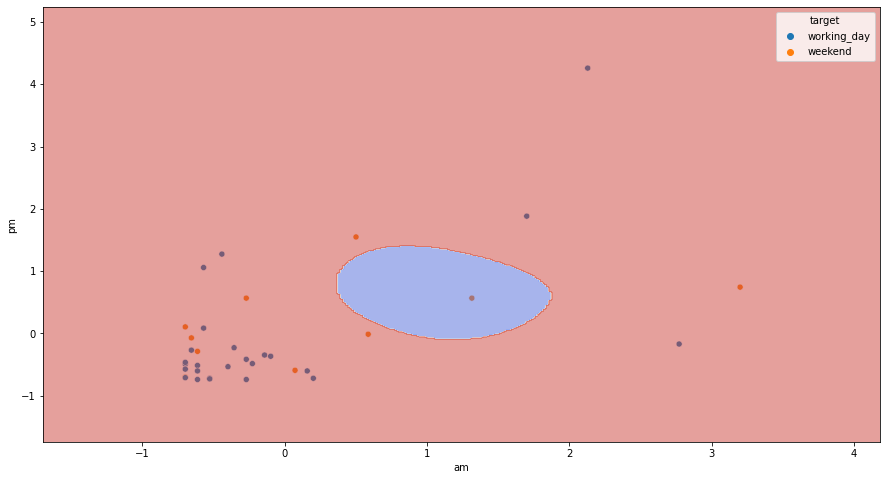

In [19]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x="am", y="pm", hue="target", ax=ax)
plot_contours(ax, model_svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


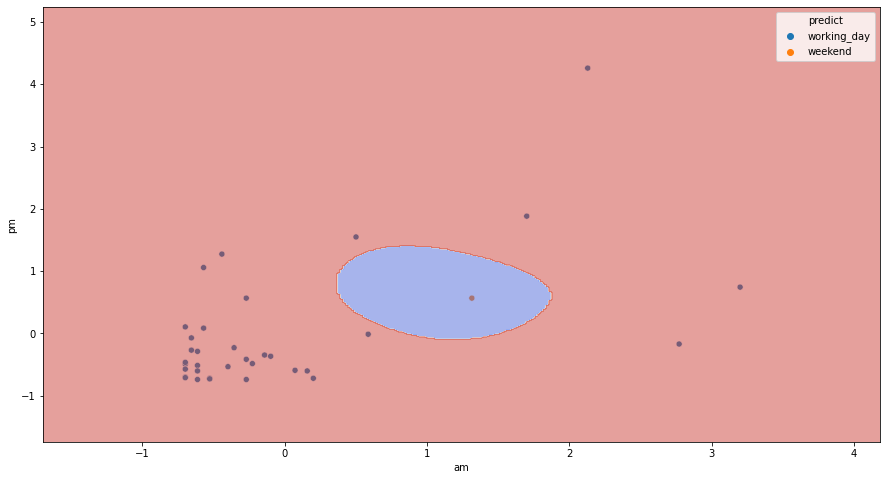

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x="am", y="pm", hue="predict", ax=ax)
plot_contours(ax, model_svm, xx, yy, cmap=plt.cm.coolwarm,alpha=0.5)

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.


1. Примените DecisionTreeClassifier к масштабированному фрейму данных, используя параметры max_depth = 4, random_state = 42.
2. Рассчитайте точность.
3. Попробуйте разные значения max_depth.
4. Снова нарисуйте оба графика с границей решений, чтобы увидеть, как работает этот алгоритм.
5. Используя метод `.plot_tree ()` визуализируйте само дерево решений. Это еще один способ думать о том, как работает алгоритм.
6. Сколько листьев на визуализированном дереве помечают дни как рабочие? Поместите свой ответ в ячейку уценки в конце раздела.

1. Примените DecisionTreeClassifier к масштабированному фрейму данных, используя параметры max_depth = 4, random_state = 42.


In [21]:
dtc_model_1 = DecisionTreeClassifier(max_depth = 4, random_state = 42)
dtc_model_1.fit(data[['am', 'pm']], test)
data['predict'] = dtc_model_1.predict(data[['am', 'pm']])

2. Рассчитайте точность.


In [22]:
accuracy_score(test, data['predict'])

0.9428571428571428

3. Попробуйте разные значения max_depth.

In [23]:
dtc_model = DecisionTreeClassifier(max_depth = 1, random_state = 42)
dtc_model.fit(data[['am', 'pm']], test)
accuracy_score(test, dtc_model.predict(data[['am', 'pm']]))

0.7714285714285715

In [24]:
dtc_model = DecisionTreeClassifier(max_depth = 6, random_state = 42)
dtc_model.fit(data[['am', 'pm']], test)
accuracy_score(test, dtc_model.predict(data[['am', 'pm']]))

1.0

4. Снова нарисуйте оба графика с границей решений, чтобы увидеть, как работает этот алгоритм.


In [25]:
X0, X1 = data['am'], data['pm']
xx, yy = make_meshgrid(X0, X1)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


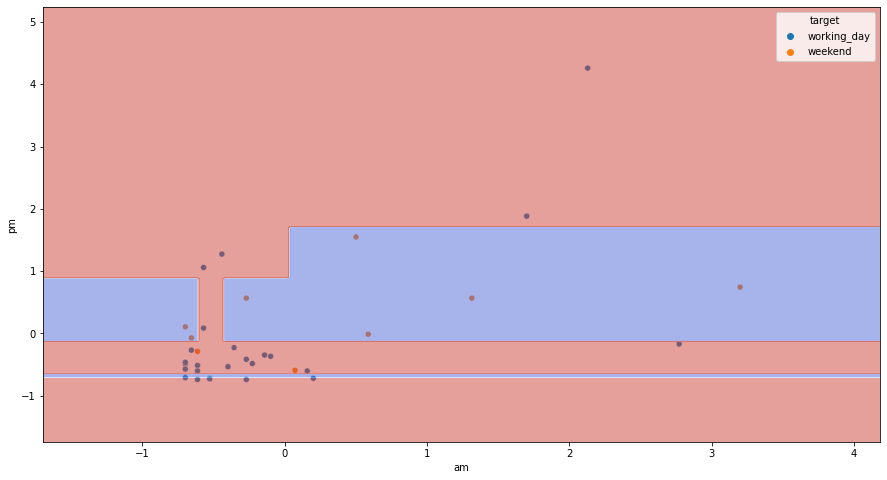

In [26]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x="am", y="pm", hue="target", ax=ax)
plot_contours(ax, dtc_model_1, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


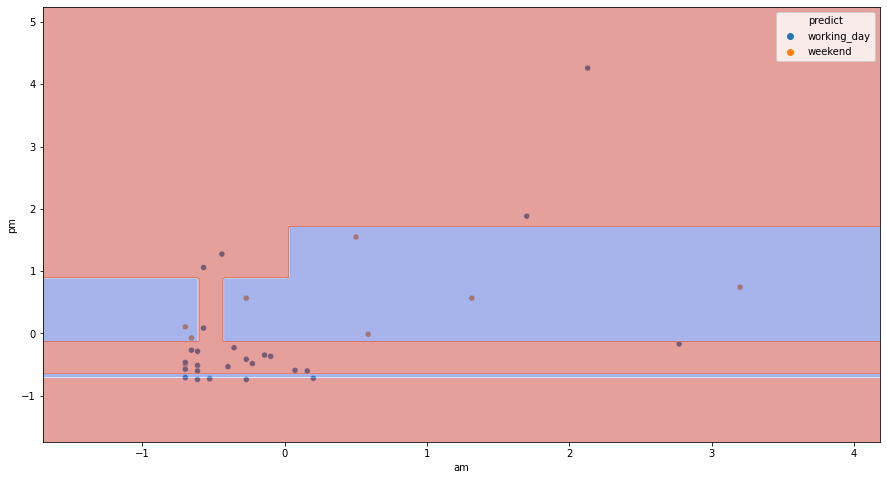

In [27]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x="am", y="pm", hue="predict", ax=ax)
plot_contours(ax, dtc_model_1, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)

5. Используя метод `.plot_tree ()` визуализируйте само дерево решений. Это еще один способ думать о том, как работает алгоритм.


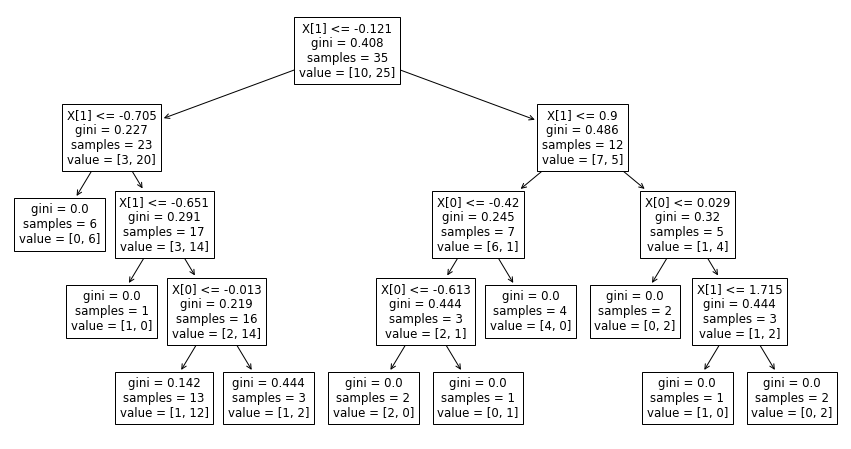

In [28]:
plt.subplots(figsize=(15,8))
plot_tree(dtc_model_1)
plt.show()

6. Сколько листьев на визуализированном дереве помечают дни как рабочие?

4